### Importing libraries

In [25]:
# datetime library to deal with dates
import datetime as dt

# for plots (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# pandas for dataframe
import pandas as pd
import numpy as np

### Reading forest fire exploration dataset (.csv)

In [59]:
forest = pd.read_csv('fire_archive.csv')

In [60]:
forest.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0

### Data exploration

In [61]:
# (rows, columns)
forest.shape

(36011, 15)

In [62]:
# available column headers
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [63]:
#  checking for null values
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [64]:
# no null values found. Summary statistics done on dataset
forest.describe()

latitude     longitude    brightness          scan         track  \
count  36011.000000  36011.000000  36011.000000  36011.000000  36011.000000   
mean     -19.100962    138.931446    328.750696      1.620905      1.215281   
std        7.265777      9.261400     18.992808      0.813764      0.247852   
min      -42.762800    114.104300    300.000000      1.000000      1.000000   
25%      -26.370250    131.072250    316.500000      1.100000      1.000000   
50%      -15.706500    136.738500    326.400000      1.300000      1.100000   
75%      -13.343600    147.477500    336.700000      1.900000      1.300000   
max      -10.072600    153.490400    504.400000      4.800000      2.000000   

           acq_time    confidence       version    bright_t31           frp  \
count  36011.000000  36011.000000  3.601100e+04  36011.000000  36011.000000   
mean     600.025798     67.551387  6.300000e+00    301.339138     51.132176   
std      548.369111     23.179946  3.728625e-12      9.724462     92.280112   
min        0.000000      0.000000  6.300000e+00    267.000000      0.000000   
25%      205.000000     52.000000  6.300000e+00    293.600000     13.800000   
50%      424.000000     70.000000  6.300000e+00    302.400000     25.800000   
75%      600.000000     86.000000  6.300000e+00    308.600000     52.800000   
max     2359.000000    100.000000  6.300000e+00    400.100000   3679.500000   

               type  
count  36011.000000  
mean       0.019439  
std        0.198326  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000

<AxesSubplot:>

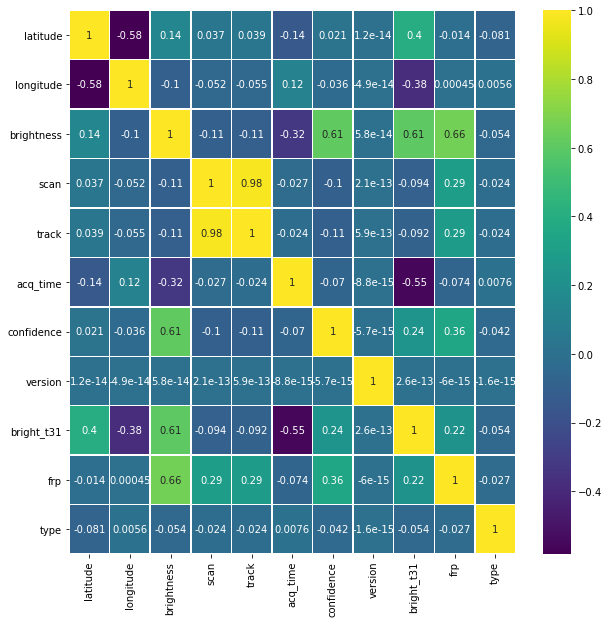

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

### Data Cleaning

In [65]:
# Here we are dropping the track column
forest = forest.drop(['track'], axis = 1)

In [34]:
# finding categorical data
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
1558      1
635       1
1153      1
302       1
1519      1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



From the above data, we can see that some columns have just one value recurring in them, meaning they are not valuable to us
So we will drop them altogether. Thus only satellite and day-night columns are the only categorical type.

In [66]:
forest = forest.drop(['instrument', 'version'], axis = 1)
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56     Terra   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56     Terra   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57     Terra   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57     Terra   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57     Terra   

   confidence  bright_t31   frp daynight  type  
0          48       297.3   6.6        D     0  
1          71       297.3  11.3        D     0  
2          42       298.7  23.1        D     0  
3          33       296.1   6.5        D     0  
4          36       298.8  27.6        D     0

In [67]:


daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

# daynight_map
# forest['daynight']
# forest['satellite']

In [68]:
forest['daynight'] = forest['daynight'].map({'D':1, 'N':0})
forest['satellite'] = forest['satellite'].map({'Terra':1, 'Aqua':0})

In [48]:
print(forest['daynight'])
print(forest['satellite'])

0        1
1        1
2        1
3        1
4        1
        ..
36006    0
36007    0
36008    0
36009    0
36010    0
Name: satellite, Length: 36011, dtype: int64

In [69]:
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type  
0          48       297.3   6.6         1     0  
1          71       297.3  11.3         1     0  
2          42       298.7  23.1         1     0  
3          33       296.1   6.5         1     0  
4          36       298.8  27.6         1     0

In [70]:
# Looking at the type of another column
forest['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [71]:
# Concatenating forest and types data frame
types = pd.get_dummies(forest['type'])
print(types)

       0  2  3
0      1  0  0
1      1  0  0
2      1  0  0
3      1  0  0
4      1  0  0
...   .. .. ..
36006  1  0  0
36007  1  0  0
36008  1  0  0
36009  1  0  0
36010  0  1  0

[36011 rows x 3 columns]


In [72]:
forest = pd.concat([forest, types], axis=1)
forest = forest.drop(['type'], axis = 1)

forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  0  2  3  
0          48       297.3   6.6         1  1  0  0  
1          71       297.3  11.3         1  1  0  0  
2          42       298.7  23.1         1  1  0  0  
3          33       296.1   6.5         1  1  0  0  
4          36       298.8  27.6         1  1  0  0

In [73]:
# Renaming columns for better understanding
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [74]:
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3  
0          48       297.3   6.6         1       1       0       0  
1          71       297.3  11.3         1       1       0       0  
2          42       298.7  23.1         1       1       0       0  
3          33       296.1   6.5         1       1       0       0  
4          36       298.8  27.6         1       1       0       0

In [77]:
# we will be converting scan column to categorical type, we will be doing this using the binning method.
print(f"The max value for the scan column: {forest['scan'].max()}, The min value for the scan column: {forest['scan'].min()}")


The max value for the scan column: 4.8, The min value for the scan column: 1.0


In [78]:
# Binning Method
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

In [79]:
forest['scan_binned']

0        1
1        1
2        4
3        2
4        4
        ..
36006    2
36007    1
36008    1
36009    1
36010    2
Name: scan_binned, Length: 36011, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [80]:
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3 scan_binned  
0          48       297.3   6.6         1       1       0       0           1  
1          71       297.3  11.3         1       1       0       0           1  
2          42       298.7  23.1         1       1       0       0           4  
3          33       296.1   6.5         1       1       0       0           2  
4          36       298.8  27.6         1       1       0       0           4

In [81]:
# Converting the datatype to datetype from string or NumPy.

forest['acq_date']

0        2019-08-01
1        2019-08-01
2        2019-08-01
3        2019-08-01
4        2019-08-01
            ...    
36006    2019-09-30
36007    2019-09-30
36008    2019-09-30
36009    2019-09-30
36010    2019-09-30
Name: acq_date, Length: 36011, dtype: object

In [82]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])
forest['acq_date']

0       2019-08-01
1       2019-08-01
2       2019-08-01
3       2019-08-01
4       2019-08-01
           ...    
36006   2019-09-30
36007   2019-09-30
36008   2019-09-30
36009   2019-09-30
36010   2019-09-30
Name: acq_date, Length: 36011, dtype: datetime64[ns]

In [83]:
# Now we will be dropping the scan column and handle datetype data – we can extract useful information from these datatypes just like we do with categorical data.
forest = forest.drop(['scan'], axis = 1)

In [84]:
# Creating a new column year with the help of acq_date column 
forest['year'] = forest['acq_date'].dt.year
forest.head()

latitude  longitude  brightness   acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0 2019-08-01        56          1   
1  -11.7924   142.0850       319.3 2019-08-01        56          1   
2  -12.8398   132.8744       311.6 2019-08-01        57          1   
3  -14.4306   143.3035       310.1 2019-08-01        57          1   
4  -12.4953   131.4897       310.3 2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3 scan_binned  \
0          48       297.3   6.6         1       1       0       0           1   
1          71       297.3  11.3         1       1       0       0           1   
2          42       298.7  23.1         1       1       0       0           4   
3          33       296.1   6.5         1       1       0       0           2   
4          36       298.8  27.6         1       1       0       0           4   

   year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [86]:
# adding month and day column

forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day
forest.head()

latitude  longitude  brightness   acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0 2019-08-01        56          1   
1  -11.7924   142.0850       319.3 2019-08-01        56          1   
2  -12.8398   132.8744       311.6 2019-08-01        57          1   
3  -14.4306   143.3035       310.1 2019-08-01        57          1   
4  -12.4953   131.4897       310.3 2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3 scan_binned  \
0          48       297.3   6.6         1       1       0       0           1   
1          71       297.3  11.3         1       1       0       0           1   
2          42       298.7  23.1         1       1       0       0           4   
3          33       296.1   6.5         1       1       0       0           2   
4          36       298.8  27.6         1       1       0       0           4   

   year  month  day  
0  2019      8    1  
1  2019      8    1  
2  2019      8    1  
3  2019      8    1  
4  2019      8    1

In [87]:
forest.shape

(36011, 17)

In [88]:
# Separating our target variable
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<AxesSubplot:>

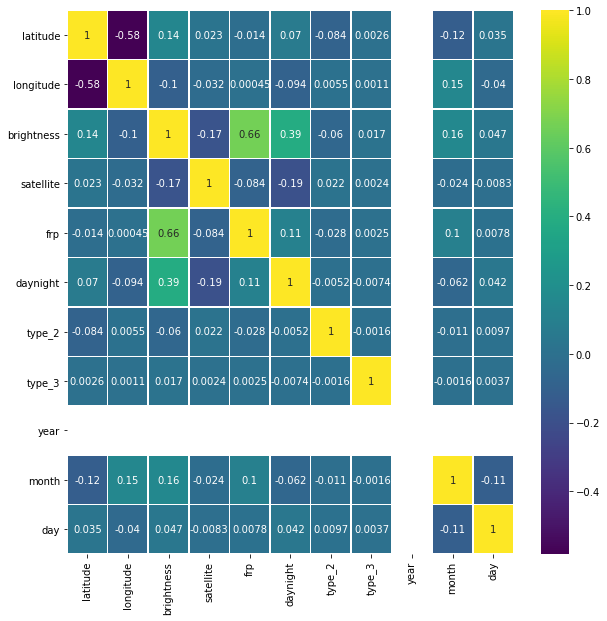

In [89]:
# Checking for correlation once again
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [90]:
# cleaned dataset
fin.head()


latitude  longitude  brightness  satellite   frp  daynight  type_2  type_3  \
0  -11.8070   142.0583       313.0          1   6.6         1       0       0   
1  -11.7924   142.0850       319.3          1  11.3         1       0       0   
2  -12.8398   132.8744       311.6          1  23.1         1       0       0   
3  -14.4306   143.3035       310.1          1   6.5         1       0       0   
4  -12.4953   131.4897       310.3          1  27.6         1       0       0   

  scan_binned  year  month  day  
0           1  2019      8    1  
1           1  2019      8    1  
2           4  2019      8    1  
3           2  2019      8    1  
4           4  2019      8    1